In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\reyna\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\reyna\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\reyna\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_excel("C:/Users/reyna/OneDrive/Desktop/Lumber.xlsx",index_col='Date',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,Price
Date,
2016-01-01,258
2016-02-01,267
2016-03-01,277
2016-04-01,300
2016-05-01,296


In [4]:
df.tail()

,Price
Date,
2022-03-01,1451
2022-04-01,1193
2022-05-01,1040
2022-06-01,1012
2022-07-01,659


<AxesSubplot:xlabel='Date'>

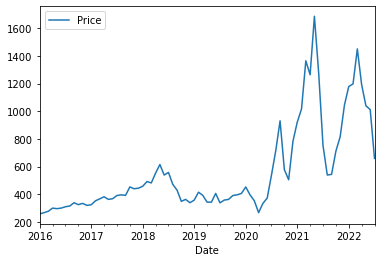

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.469836
p-value: 0.122987


<function matplotlib.pyplot.show(close=None, block=None)>

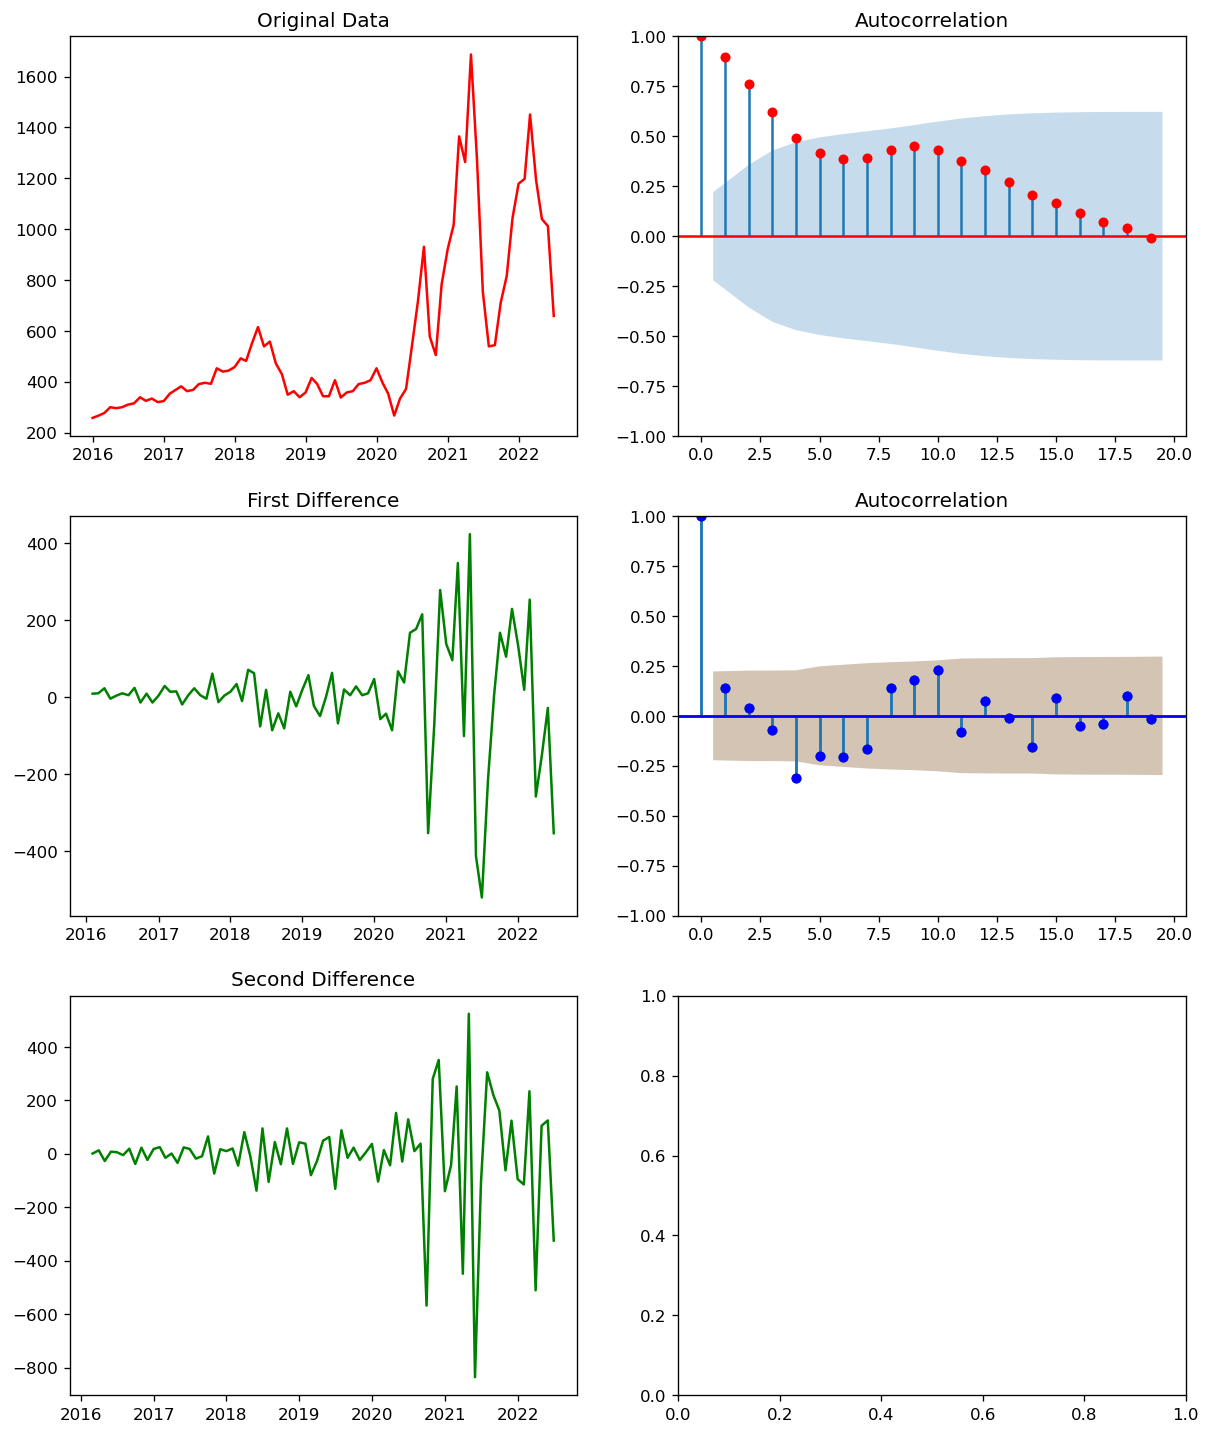

In [7]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
#Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df.Price,color="r"); axes[0, 0].set_title('Original Data')
plot_acf(df.Price, ax=axes[0, 1], color="r")

#First Difference
axes[1, 0].plot(df.Price.diff(), color="g"); axes[1, 0].set_title("First Difference")
plot_acf(df.Price.diff().dropna(), ax=axes[1, 1], color="g")

#Second Difference
axes[2, 0].plot(df.Price.diff().diff(), color="g"); axes[2, 0].set_title("Second Difference")
plot_acf(df.Price.diff().dropna(), ax=axes[1, 1], color="b")

plt.show


In [8]:
#Firt Difference test
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Price.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.668451
p-value: 0.000001


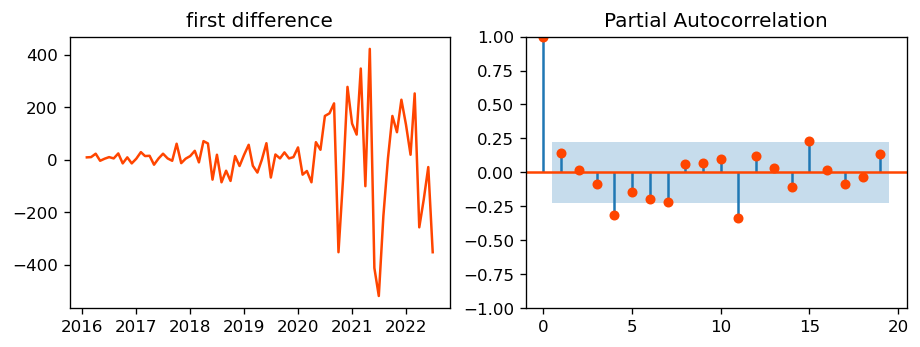

In [9]:
#PACF plot of first differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.Price.diff(),color="orangered"); axes[0].set_title("first difference")
axes[1].set(ylim=(-1,4))
plot_pacf(df.Price.diff().dropna(), ax=axes[1],color="orangered")
plt.show()

In [10]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


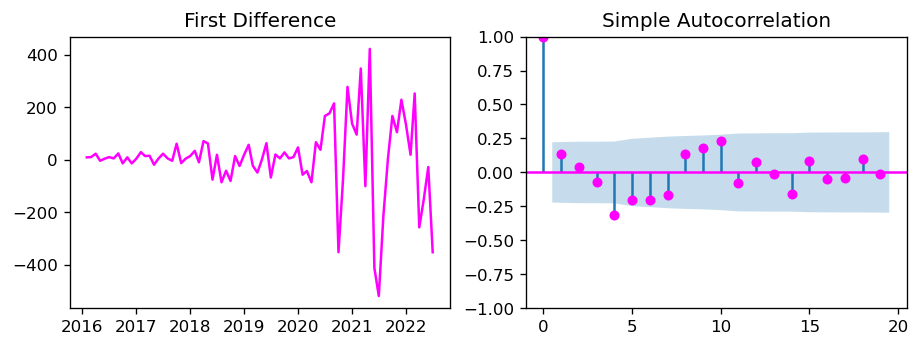

In [11]:
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.Price.diff(), color="fuchsia"); axes[0].set_title('First Difference')
axes[1].set(ylim=(-2,4))
plot_acf(df.Price.diff().dropna(), ax=axes[1],color="fuchsia")
plt.title("Simple Autocorrelation")

plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

#1,1,2 ARIMA Model
model_1 = ARIMA(df.Price, order=(2,2,1))
model_fit1 = model_1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   79
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -493.245
Date:                Thu, 01 Sep 2022   AIC                            994.490
Time:                        20:26:15   BIC                           1003.865
Sample:                    01-01-2016   HQIC                           998.240
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1610      0.090      1.787      0.074      -0.016       0.338
ar.L2          0.0326      0.097      0.336      0.737      -0.158       0.223
ma.L1         -0.9998      7.857     -0.127      0.8

In [13]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model_fit1.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,17.552483,0.062998


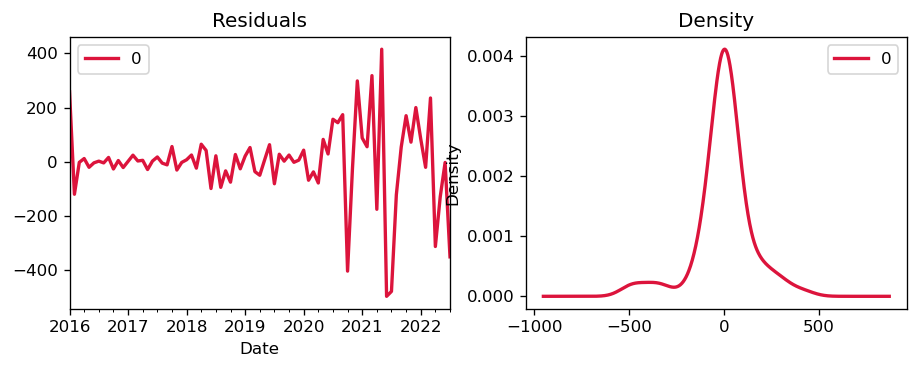

In [14]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
#plot  residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], color="crimson", lw=2)
residuals.plot(kind='kde', title='Density', ax=ax[1], color="crimson", lw=2)
plt.show()

In [15]:
 import statsmodels
 statsmodels.__version__




'0.13.2'

In [70]:
 pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.


In [17]:

from statsmodels.graphics.tsaplots import plot_predict

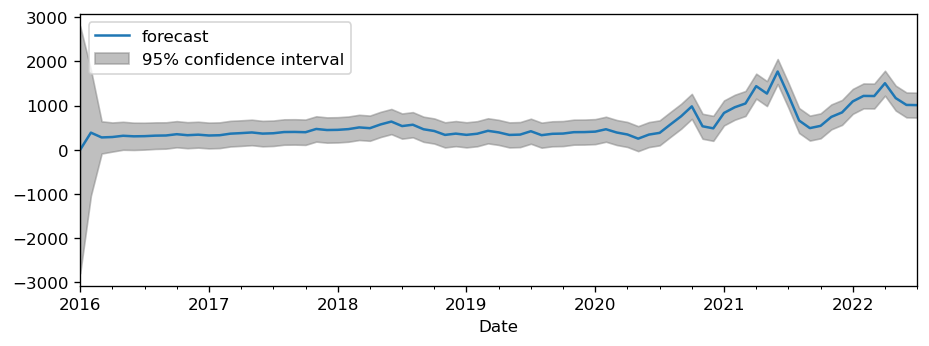

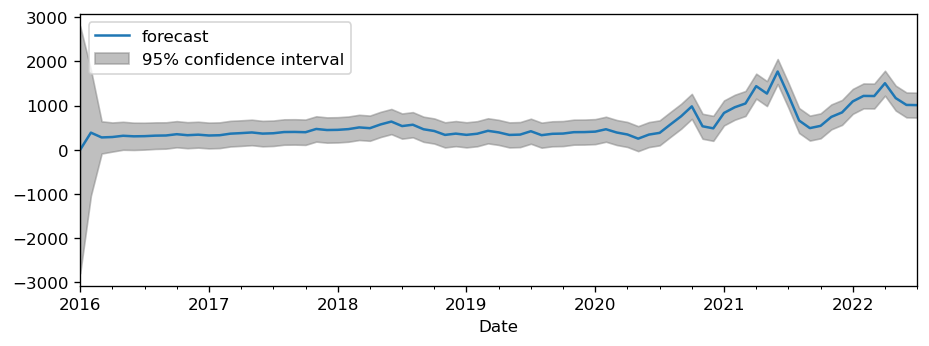

In [19]:
plot_predict(model_fit1)

In [18]:
#Actual vs Fitted
model_fit1.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [16]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df)

(0.24990406773968651, True)

In [17]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values, icbest_ = adfuller(df)
print("pvalue = ", pvalue, "if above 0.05 data is not stationary")

pvalue =  0.12298710979703531 if above 0.05 data is not stationary


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Price'],
                               model='additive')

In [19]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

<function matplotlib.pyplot.show(close=None, block=None)>

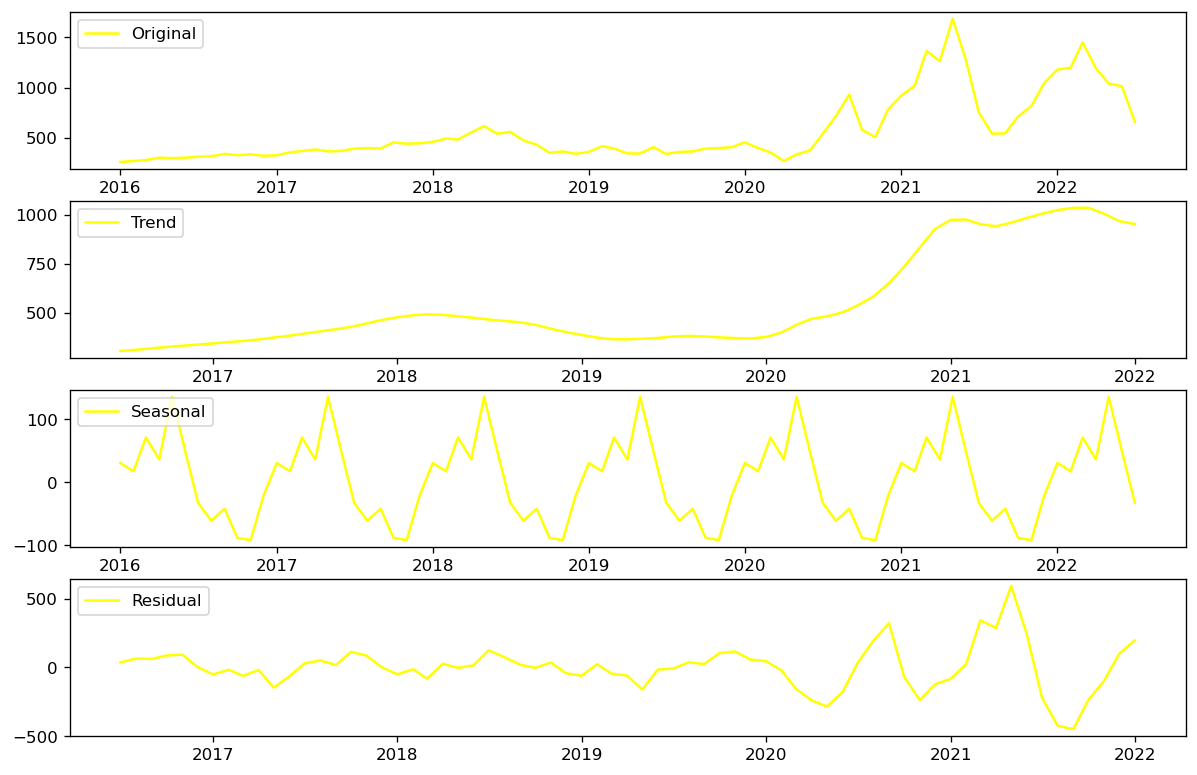

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show


In [21]:
from pmdarima.arima import auto_arima

In [14]:
arima_model = auto_arima(df['Price'], start_p=1, d=1, start_q=1,
                        max_p=5, max_q=5, max_d=5, m=12,
                        start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                        seasonal=True,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=887.190, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=885.954, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=867.325, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=866.209, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=885.190, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=867.286, Time=0.40 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=867.046, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=867.427, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=869.040, Time=1.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=866.287, Time=0.11 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=868.084, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=866.193, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=885.416, Time=0.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             

In [15]:
print(arima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -430.097
Date:                              Tue, 30 Aug 2022   AIC                            866.193
Time:                                      19:07:08   BIC                            872.762
Sample:                                  01-01-2016   HQIC                           868.789
                                       - 07-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1785      0.074      2.419      0.016       0.034       0.323
ma.S.L12      -0.63

In [39]:
size = int(len(df) * 0.80)
X_train, X_test = df[0:size], df[size:len(df)]

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model = SARIMAX(X_train['Price'],
               order=(1,1,0),
               seasonal_order=(0,1,1,12))

In [33]:
result = model.fit
result.summary

AttributeError: 'function' object has no attribute 'summary'

In [34]:
start_index=0
end_index=len(df)-1
prediction=result.predict(star_index, end_index)

AttributeError: 'function' object has no attribute 'predict'

In [22]:
test_result=adfuller(df['Price'])

In [23]:
def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF Test Statistic','p-value','#lag used','NUmber of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against H0")
    else:
        print("weak evidence against H0")
    

In [24]:
adfuller_test(df['Price'])

ADF Test Statistic : -2.469835928407722
p-value : 0.12298710979703531
#lag used : 1
NUmber of Observations Used : 77
weak evidence against H0


In [25]:
df['Price first difference'] = df['Price'] - df['Price'].shift(1)

In [26]:
adfuller_test(df['Price first difference'].dropna())

ADF Test Statistic : -5.6684510840683195
p-value : 9.037410347616586e-07
#lag used : 6
NUmber of Observations Used : 71
strong evidence against H0


<AxesSubplot:xlabel='Date'>

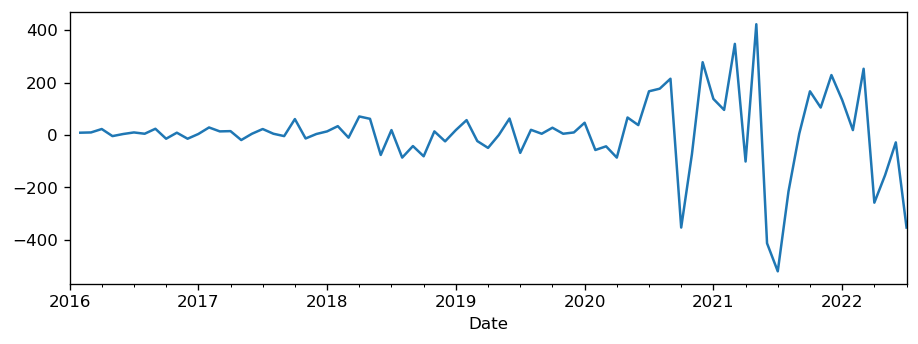

In [27]:
df['Price first difference'].plot()

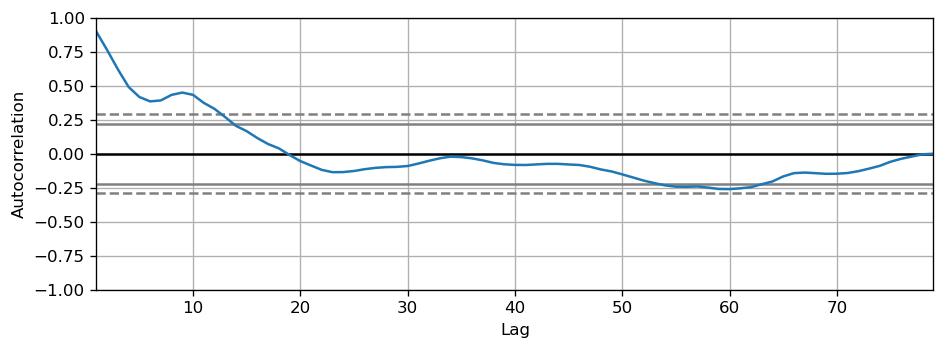

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


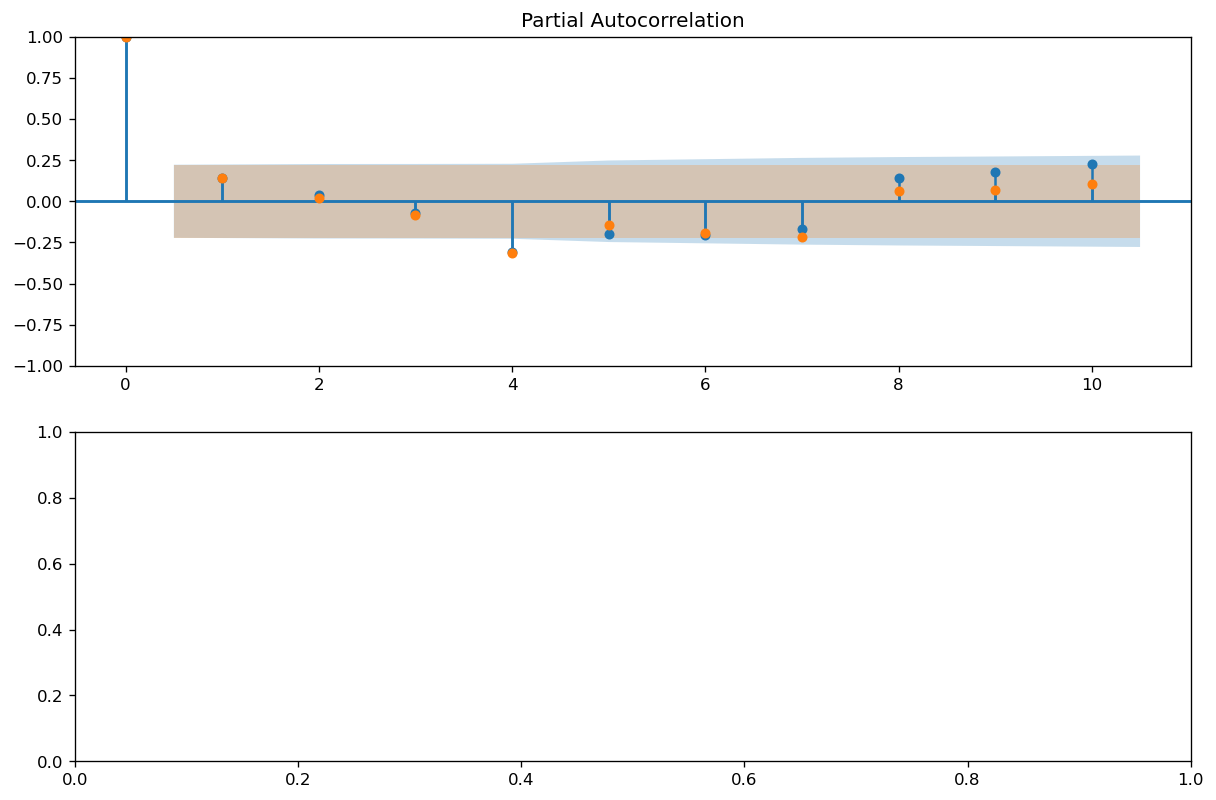

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price first difference'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price first difference'].dropna(),lags=10,ax=ax1)


In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
model=ARIMA(df['Price'],order=(1,1,1))
model_fit=model.fit()

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   79
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -497.185
Date:                Thu, 01 Sep 2022   AIC                           1000.369
Time:                        20:27:55   BIC                           1007.439
Sample:                    01-01-2016   HQIC                          1003.199
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2071      0.476      0.435      0.663      -0.725       1.139
ma.L1         -0.0567      0.452     -0.125      0.900      -0.944       0.830
sigma2      2.013e+04   1982.679     10.155      0.000    1.62e+04     2.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.37
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             151.17   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
import statsmodels.api as sm

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
model = SARIMAX(X_train['Price'],
               order=(1,1,0),
               seasonal_order=(0,1,1,12))
result = model.fit

In [44]:
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(2,2,2),seasonal_order=(1,1,1,3))
result=model.fit()